# Problem 5.3


**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 5**

**Problem 5.3**

**Using the tabulated refractive index for silicon provided in the data “Si_nk.txt.”**

**(a) Calculate the reflectivity of silicon as a function of wavelength.**

**(b) Calculate the reflectivity if the surface is textured so that the light impinges the surface twice.**

**(c) Which percentage of the global irradiance spectrum AM1.5 G corresponding to wavelengths below 1100 nm (i.e., useful for silicon solar cells) is reflected in each case?**


First, we import the Python modules used

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


We load the data for silicon refractive index and AM1.5G solar spectrum

In [2]:
# Load nk and solar spectrum data
# We assume the data is in the same folder as the notebook file

#Data columns: wavelength(nm) refractive_index extinction_coefficient
Si_nk = np.loadtxt("data/Si_nk.txt", skiprows=2, delimiter='\t')

#Data columns: wavelength(nm) spectral_irradiance (W·m-2·nm-1)
AM15G = np.loadtxt("data/am15g_G173_W.txt", skiprows=1, delimiter='\t')


Calculate the spectral reflectivity at normal incidence

In [3]:
nData = Si_nk.shape[0]
Rfl = np.zeros((nData,2))
Rfl[:,0] = np.arange(Si_nk[0,0], Si_nk[0,0]+nData, 1)

for x in range(nData):
    nSi = np.interp(Rfl[x,0], Si_nk[:,0],Si_nk[:,1])
    Rfl[x,1] = ((1-nSi)/(1+nSi))**2

Rfl_txtred = Rfl.copy()

Rfl_txtred[:,1] *= Rfl_txtred[:,1]

Plot the data

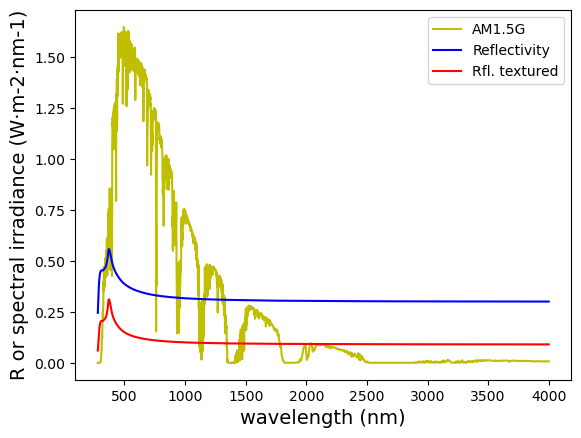

In [4]:
plt.plot(AM15G[:,0], AM15G[:,1], color='y', label='AM1.5G')
plt.plot(Rfl[:,0], Rfl[:,1], color='b', label='Reflectivity')
plt.plot(Rfl_txtred[:,0], Rfl_txtred[:,1], color='r', label='Rfl. textured')


plt.xlabel('wavelength (nm)', size=14)
plt.ylabel('R or spectral irradiance (W·m-2·nm-1)', size=14)
plt.ylim()
plt.legend()

# Save figure
plt.savefig("fig_S5.3.png", dpi=300)

In [5]:
Rfl_power = Rfl.copy()
Rfl_power_txtred = Rfl_txtred.copy()
AM15G_SiRange = AM15G.copy()

for x in range(nData):
    Rfl_power[x,1] *= np.interp(Rfl_power[x,0], AM15G[:,0],AM15G[:,1])
    Rfl_power_txtred[x,1] *= np.interp(Rfl_power_txtred[x,0], AM15G[:,0],AM15G[:,1])
   
    if Rfl_power[x,0] > 1100:   #only up to bandgap of silicon
        Rfl_power[x,1]=0
        Rfl_power_txtred[x,1]=0
        AM15G_SiRange[x,1]=0
        

Total_W_Si = np.trapz( AM15G_SiRange[:,1], x= AM15G_SiRange[:,0], axis=0)

R_W = np.trapz(Rfl_power[:,1], x=Rfl_power[:,0], axis=0)
R_W_txtred = np.trapz(Rfl_power_txtred[:,1], x=Rfl_power_txtred[:,0], axis=0)

#print(Total_W)
print("Reflected power: " + f"{R_W:.1f}" + " W/m2 (" + f"{100*R_W/Total_W_Si:.1f}" + "%)" )
print("Reflected power with texturing: " + f"{R_W_txtred:.1f}" + " W/m2 (" + f"{100*R_W_txtred/Total_W_Si:.1f}" + "%)" )

Reflected power: 292.5 W/m2 (36.3%)
Reflected power with texturing: 108.4 W/m2 (13.5%)


The effect in reducing the reflected light power is demonstrated.